In [1]:
import pandas as pd
import numpy as np
import imblearn


In [2]:
df = pd.read_csv("Data_for_UCI_named.csv")

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [5]:
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [6]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

<AxesSubplot:xlabel='stabf', ylabel='count'>

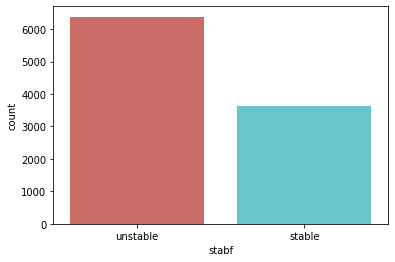

In [7]:
import seaborn as sns
sns.countplot(x = 'stabf', data = df, palette = 'hls')

In [8]:
df = df.drop(columns = 'stab')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [9]:
X = df.drop(columns = 'stabf')
y = df['stabf']


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_df = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
scaled_test_df = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)


In [12]:
y_test.value_counts()

unstable    1288
stable       712
Name: stabf, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state= 1)
log_reg.fit(scaled_train_df, y_train)

LogisticRegression(random_state=1)

# __Random Forest Classifier__

In [14]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(random_state = 1)
rand_forest.fit(scaled_train_df, y_train)


RandomForestClassifier(random_state=1)

In [15]:
y_pred = rand_forest.predict(scaled_test_df)


## __What is the accuracy on the test set using the random forest classifier? In 4 decimal places.__

In [16]:
a = rand_forest.score(scaled_test_df, y_test)

In [17]:
print(a)

0.929


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
b = accuracy_score(y_test, y_pred)

In [19]:
print(b)

0.929


# __XGBOOST CLASSIFIER__

In [20]:
import xgboost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state = 1)

In [21]:
xgb_clf.fit(scaled_train_df, y_train)
xgb_y_pred = xgb_clf.predict(scaled_test_df)

C:\Users\Aliiu\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:38:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## __What is the accuracy on the test set using the xgboost classifier? In 4 decimal places.__

In [22]:
xgb_acc = accuracy_score(y_test, xgb_y_pred)
xgb_acc

0.9455

# __LIGHT GMB CLASSIFIER__

In [23]:
import lightgbm
from lightgbm import LGBMClassifier

In [24]:
lgbm_clf = LGBMClassifier(random_state = 1)
lgbm_clf.fit(scaled_train_df, y_train)

LGBMClassifier(random_state=1)

In [25]:
lgbm_y_pred = lgbm_clf.predict(scaled_test_df)

## __What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.__

In [26]:
lgbm_acc = accuracy_score(y_test, lgbm_y_pred)
lgbm_acc

0.9395

# __EXTRA TREES CLASSIFIER__

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
Etree = ExtraTreesClassifier(random_state=1, n_estimators = 5, min_samples_split= 5, min_samples_leaf= 5, max_features = 4)
Etree.fit(scaled_train_df, y_train)
y_tree_pred = Etree.predict(scaled_test_df)

In [28]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split, 'max_features': max_features}

## __What are the best hyperparameters from the randomized search CV?__

In [29]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(Etree, hyperparameter_grid, random_state = 1)
search = rscv.fit(scaled_train_df, y_train)
search.best_params_.values()

dict_values([1000, 2, 8, None])

## __Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?__

In [30]:
opt_Etree = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features= 4, random_state=1)
opt_Etree.fit(scaled_train_df, y_train)
y_Etree_p_pred = opt_Etree.predict(scaled_test_df)

In [31]:
Etree_acc = accuracy_score(y_test, y_tree_pred)
Etree_acc

0.885

In [32]:
opt_Etree_acc = accuracy_score(y_test, y_Etree_p_pred)
opt_Etree_acc

0.927

## __Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?__

In [33]:
feature_importance = opt_Etree.feature_importances_ 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in opt_Etree.estimators_], axis = 0)

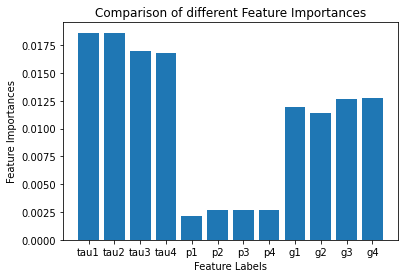

In [34]:
import matplotlib.pyplot as plt
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()